In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import anderson, kstest
import numpy as np

df = pd.read_csv('C:/Users/Shuhrat/VsCode/VisualizationISA/ex_04/EFIplus_medit.csv', sep=';')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB
None
    Site_code   Latitude  Longitude Country Catchment_name  Galiza  Subsample  \
0  ES_01_0002  38.102003  -4.096070   Spain   Guadalquivir       0          1   
1  ES_02_0001  40.530188  -1.887796   Spain           Tejo       0          1   
2  ES_02_0002  40.595432  -1.928079   Spain           Tejo       0          1   
3  ES_02_0003  40.656184  -1.989831   Spain           Tejo       0          1   
4  ES_02_0004  40.676402  -2.036274   Spain           Tejo       0          1   

   Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  Squalius malacitanus  \
0                0              1             0  ...                     0   
1                1              1             1  ...                     0   
2                1              1             1  ...                     0   
3

### Task 1: Visualizing the effect of temp_ann on the presence of Brown Trout (Salmo trutta fario)

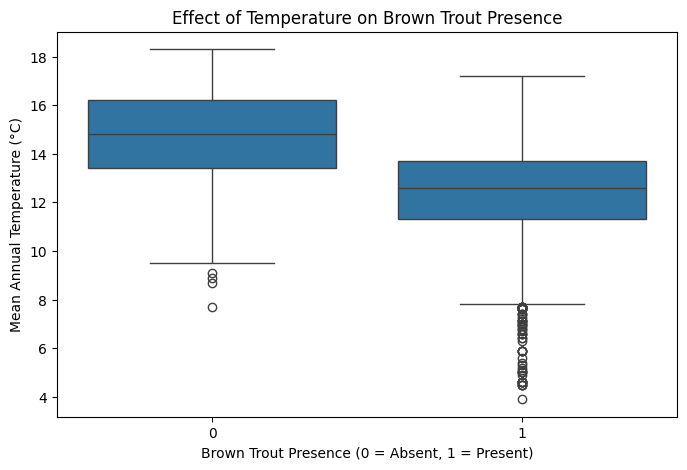

In [3]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Salmo trutta fario"], y=df["temp_ann"])
plt.xlabel("Brown Trout Presence (0 = Absent, 1 = Present)")
plt.ylabel("Mean Annual Temperature (°C)")
plt.title("Effect of Temperature on Brown Trout Presence")
plt.show()

### Task 2: Checking if actual_river_slope follows a normal distribution

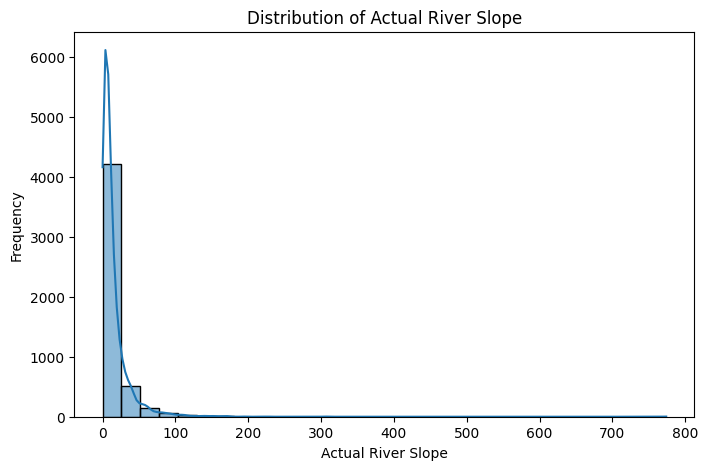

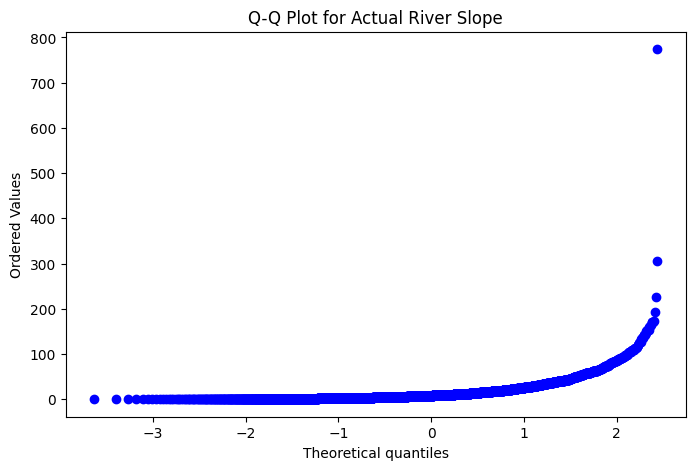

ShapiroResult(statistic=np.float64(0.5163239471574013), pvalue=np.float64(2.591069478544196e-79))

In [4]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Actual_river_slope"], bins=30, kde=True)
plt.xlabel("Actual River Slope")
plt.ylabel("Frequency")
plt.title("Distribution of Actual River Slope")
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 5))
stats.probplot(df["Actual_river_slope"], dist="norm", plot=plt)
plt.title("Q-Q Plot for Actual River Slope")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(df["Actual_river_slope"].dropna())
shapiro_test

### Task 3: Bootstrapping 100 samples of 2000 observations

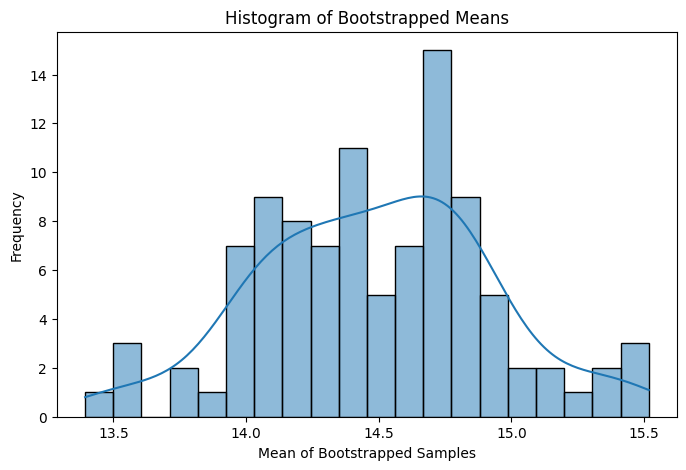

ShapiroResult(statistic=np.float64(0.9896149560250422), pvalue=np.float64(0.6335299560928342))

In [8]:
bootstrap_means = [df["Actual_river_slope"].sample(n=2000, replace=True).mean() for _ in range(100)]

# Histogram of bootstrapped means
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_means, bins=20, kde=True)
plt.xlabel("Mean of Bootstrapped Samples")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Means")
plt.show()

# Shapiro-Wilk test for normality of bootstrapped means
shapiro_bootstrap = stats.shapiro(bootstrap_means)
shapiro_bootstrap

### Import additional libraries for normality testing

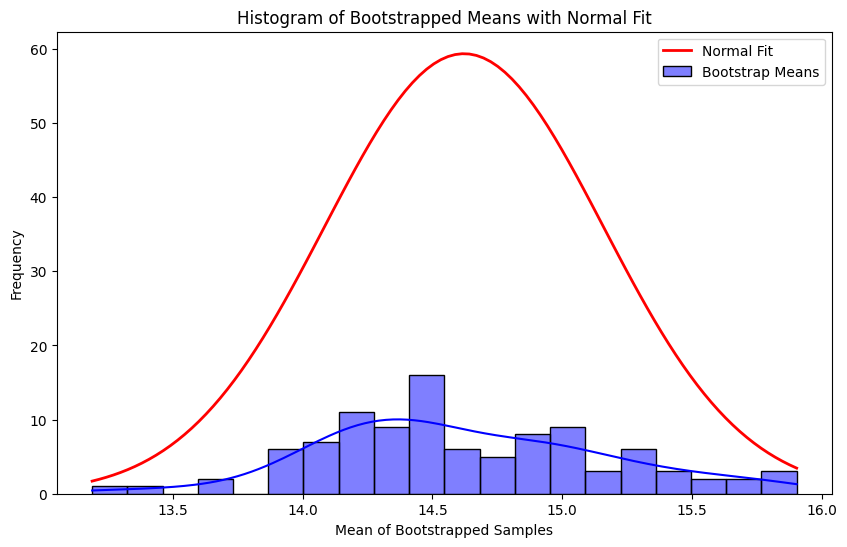

{'Shapiro-Wilk p-value': np.float64(0.18986553495462566),
 'Kolmogorov-Smirnov p-value': np.float64(0.36495606564140304),
 'Anderson-Darling Statistic': np.float64(0.6998231744421872),
 'Mean of Bootstrap Means': np.float64(14.621419309913206),
 'Std Dev of Bootstrap Means': np.float64(0.537764946028022),
 'Theoretical Std Error (σ/√n)': np.float64(0.5052139329755478)}

In [9]:
bootstrap_means = [df["Actual_river_slope"].sample(n=2000, replace=True).mean() for _ in range(100)]

# Compute mean and standard deviation of the bootstrapped sample means
mu_bootstrap = np.mean(bootstrap_means)
std_bootstrap = np.std(bootstrap_means)
theoretical_std_error = np.std(df["Actual_river_slope"]) / np.sqrt(2000)

# Histogram of bootstrapped means with a normal fit
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=20, kde=True, label="Bootstrap Means", color="blue")

# Fit a normal distribution to the sample means
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
plt.plot(x, stats.norm.pdf(x, mu_bootstrap, std_bootstrap) * len(bootstrap_means) * 0.8, 'r-', linewidth=2, label="Normal Fit")

# Titles and labels
plt.xlabel("Mean of Bootstrapped Samples")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Means with Normal Fit")
plt.legend()
plt.show()

# Perform additional normality tests
shapiro_stat, shapiro_p = stats.shapiro(bootstrap_means)
anderson_result = anderson(bootstrap_means, dist="norm")
ks_stat, ks_p = kstest(bootstrap_means, 'norm', args=(mu_bootstrap, std_bootstrap))

# Display results
normality_results = {
    "Shapiro-Wilk p-value": shapiro_p,
    "Kolmogorov-Smirnov p-value": ks_p,
    "Anderson-Darling Statistic": anderson_result.statistic,
    "Mean of Bootstrap Means": mu_bootstrap,
    "Std Dev of Bootstrap Means": std_bootstrap,
    "Theoretical Std Error (σ/√n)": theoretical_std_error
}

normality_results